# First Code Sample for Data Fitting <br> over a large scattter
This is the first code ChatGPT produced when prompted with: <br>
``
write a curve fitting jupyter notebook using pytorch MLP. input are X and Y values, output Y values for given X
``

Epoch 10000/100000, Loss = 0.0146
Epoch 20000/100000, Loss = 0.0146
Epoch 30000/100000, Loss = 0.0146
Epoch 40000/100000, Loss = 0.0146
Epoch 50000/100000, Loss = 0.0146
Epoch 60000/100000, Loss = 0.0146
Epoch 70000/100000, Loss = 0.0146
Epoch 80000/100000, Loss = 0.0146
Epoch 90000/100000, Loss = 0.0146
Epoch 100000/100000, Loss = 0.0146


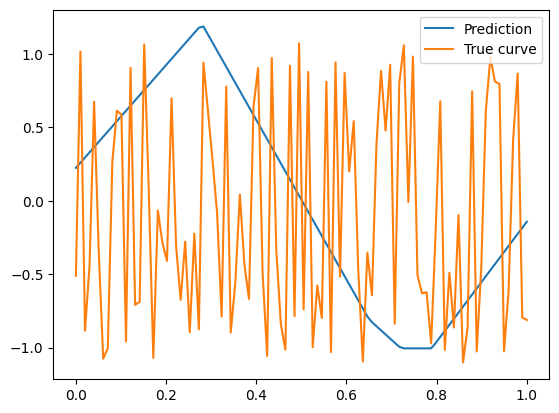

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Generate some synthetic data for curve fitting
def true_fun(X):
   return torch.sin(2 * np.pi * X)

X = torch.rand(100, 1)
Y = true_fun(X) + 0.1 * torch.randn(X.size())

# Create the MLP model
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden = torch.nn.Linear(input_size, hidden_size)
        self.output = torch.nn.Linear(hidden_size, output_size)
    
    def forward(self, X):
        X = torch.relu(self.hidden(X))
        X = self.output(X)
        return X

model = MLP(1, 100, 1)

# Set up the optimization and loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = torch.nn.MSELoss()

# Train the model
num_epochs = 100000
for epoch in range(num_epochs):
    # Forward pass
    Y_pred = model(X)
    loss = loss_fn(Y_pred, Y)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss = {loss.item():.4f}')
        
# Plot the true curve and the predicted curve
X_test = torch.linspace(0, 1, 100).unsqueeze(1)
Y_pred_test = model(X_test)
plt.plot(X_test.numpy(), Y_pred_test.detach().numpy(), label='Prediction')
plt.plot(X_test.numpy(), Y, label='True curve')
plt.legend()
plt.show()

# Second Code Sample for Data Fitting For Ordinary Data <br> using Scheduler to Optimise the Learning Rate

ChatGPT produced this code when the first prompt (above) was extended with a sample set of data : <br>
``
write a curve fitting jupyter notebook using pytorch MLP. input are X and Y values, output Y values for given X. sample data X for 0.600, 1.000, 2.000, 2.500, 5.000, 7.700, 8.000, 9.700, 10.900 and Y for 1700.000, 1803.000, 1928.000, 1950.000, 1987.000, 2019.000, 2022.000, 2050.000, 2100.000
``

Also made a follow up prompt to ChatGPT to `optimise the learning rate`.

Epoch 00870: reducing learning rate of group 0 to 5.0000e-07.
Epoch 00883: reducing learning rate of group 0 to 5.0000e-08.
Epoch 00894: reducing learning rate of group 0 to 5.0000e-09.
Epoch 10000/100000, Loss = 3201.5496
Epoch 20000/100000, Loss = 3201.5271
Epoch 30000/100000, Loss = 3201.5039
Epoch 40000/100000, Loss = 3201.4756
Epoch 50000/100000, Loss = 3201.4492
Epoch 60000/100000, Loss = 3201.4260
Epoch 70000/100000, Loss = 3201.3994
Epoch 80000/100000, Loss = 3201.3762
Epoch 90000/100000, Loss = 3201.3518
Epoch 100000/100000, Loss = 3201.3274
tensor([[1799.0741],
        [1817.0554],
        [1840.9364],
        [1863.3153],
        [1885.6943],
        [1975.4686],
        [2035.3329],
        [2095.1968],
        [2245.5754]], grad_fn=<AddmmBackward0>)


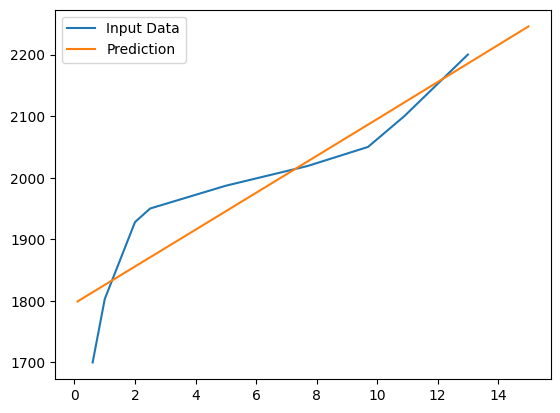

In [26]:
# Import required libraries
import numpy as np
import torch
import torch.nn as nn

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the data
X = np.array([0.600, 1.000, 2.000, 2.500, 5.000, 7.700, 9.700, 10.900, 13.0])
Y = np.array([1700.000, 1803.000, 1928.000, 1950.000, 1987.000, 2019.000, 2050.000, 2100.000, 2200.0])

# Convert data to PyTorch tensors and move to the chosen device
X = torch.tensor(X, dtype=torch.float).to(device).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float).to(device).view(-1, 1)

# Define the MLP model
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    return x

# Set the input size, hidden size, and output size for the MLP
input_size = 1
hidden_size = 10
output_size = 1

# Initialize the MLP model
model = MLP(input_size, hidden_size, output_size).to(device)

# Set the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5000e-05)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, verbose=True)

# Set the number of epochs
num_epochs = 100000

# Train the model
for epoch in range(num_epochs):
  # Forward pass
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)

  # Backward pass
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  scheduler.step(loss)
    
  # Print progress
  if (epoch + 1) % 10000 == 0:
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss = {loss.item():.4f}')

# Test the model
X_t = np.array([0.1, 0.700, 1.500, 2.250, 3.0, 6.000, 8.000, 10.0, 15.0])
X_test = torch.tensor(X_t, dtype=torch.float).to(device).view(-1, 1)
y_pred = model(X_test)
print(y_pred)

# Graphing of results
import matplotlib.pyplot as plt
plt.plot(X.numpy(), Y.numpy(), label='Input Data')
plt.plot(X_test.numpy(), y_pred.detach().numpy(), label='Prediction')
plt.legend()
plt.show()

# Third Code Sample for Data Fitting For Ordinary Data <br> without Scheduler (Constant the Learning Rate)

Removed the scheduler (Learning Curve Optimiser). It is working better than previous one but with a good manual selection (tweaking) of the learning rate.

Epoch 10000/200000, Loss = 863.7487
Epoch 20000/200000, Loss = 231.8531
Epoch 30000/200000, Loss = 186.7818
Epoch 40000/200000, Loss = 150.7027
Epoch 50000/200000, Loss = 115.5008
Epoch 60000/200000, Loss = 88.5057
Epoch 70000/200000, Loss = 62.5113
Epoch 80000/200000, Loss = 42.1744
Epoch 90000/200000, Loss = 27.2696
Epoch 100000/200000, Loss = 16.7587
Epoch 110000/200000, Loss = 10.1812
Epoch 120000/200000, Loss = 6.0442
Epoch 130000/200000, Loss = 4.0070
Epoch 140000/200000, Loss = 2.8873
Epoch 150000/200000, Loss = 2.2616
Epoch 160000/200000, Loss = 1.8987
Epoch 170000/200000, Loss = 1.6760
Epoch 180000/200000, Loss = 1.5349
Epoch 190000/200000, Loss = 1.4398
Epoch 200000/200000, Loss = 1.3748
tensor([[1571.6946],
        [1725.8264],
        [1865.5225],
        [1948.2274],
        [1958.1809],
        [1997.9946],
        [2024.5371],
        [2062.6724],
        [2313.8079]], grad_fn=<AddmmBackward0>)


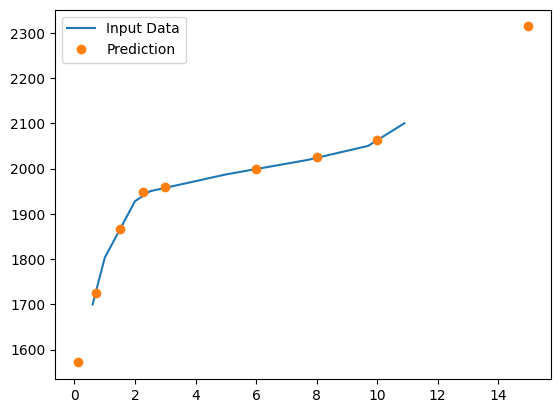

In [24]:
import numpy as np
import torch
import torch.nn as nn

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the data
X = np.array([0.600, 1.000, 2.000, 2.500, 5.000, 7.700, 9.700, 10.900])
Y = np.array([1700.000, 1803.000, 1928.000, 1950.000, 1987.000, 2019.000, 2050.000, 2100.000])

# Convert data to PyTorch tensors and move to the chosen device
X = torch.tensor(X, dtype=torch.float).to(device).view(-1, 1)
Y = torch.tensor(Y, dtype=torch.float).to(device).view(-1, 1)

# Define the MLP model
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    return x

# Set the input size, hidden size, and output size for the MLP
input_size = 1
hidden_size = 100
output_size = 1

# Initialize the MLP model
model = MLP(input_size, hidden_size, output_size).to(device)

# Set the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2.0000e-05)

# Set the number of epochs
num_epochs = 200000

# Train the model - first run
for epoch in range(num_epochs):
  # Forward pass
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)

  # Backward pass
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  # Print progress
  if (epoch + 1) % 10000 == 0:
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss = {loss.item():.4f}')

# Test the model
X_t = np.array([0.1, 0.700, 1.500, 2.250, 3.0, 6.000, 8.000, 10.0, 15.0])
X_test = torch.tensor(X_t, dtype=torch.float).to(device).view(-1, 1)
y_pred = model(X_test)
print(y_pred)

# Graphing of results
import matplotlib.pyplot as plt
plt.plot(X.numpy(), Y.numpy(), label='Input Data')
plt.plot(X_test.numpy(), y_pred.detach().numpy(), 'o', label='Prediction')
plt.legend()
plt.show()

# Final Code Sample for Data Fitting For Ordinary Data <br> with Normalisation (Standard the Learning Rate works)

Asked ChatGPT to `normalise input data before training`. This is working much better since a standard learning rate of `0.01` is always good thanks to normalisation. Testing with different value ranges for input data to prove this.

`num_epochs` might need to be increase to result in lower losses (close to zero).

Epoch 10000/50000, Loss = 0.0060
Epoch 20000/50000, Loss = 0.0020
Epoch 30000/50000, Loss = 0.0006
Epoch 40000/50000, Loss = 0.0002
Epoch 50000/50000, Loss = 0.0001
tensor([[1578.0883],
        [1725.8674],
        [1871.3666],
        [1947.8586],
        [1957.8237],
        [1997.6841],
        [2024.2577],
        [2063.0876],
        [2263.1265]], grad_fn=<AddBackward0>)


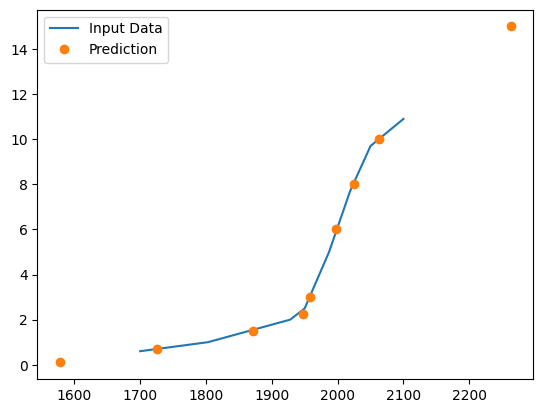

In [63]:
# import necessary libraries
import torch
import numpy as np

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# set random seed for reproducibility
torch.manual_seed(0)

# prepare the data

# World population vs years
#"""
Xdata = [0.600, 1.000, 2.000, 2.500, 5.000, 7.700, 9.700, 10.900]
Ydata = [1700.000, 1803.000, 1928.000, 1950.000, 1987.000, 2019.000, 2050.000, 2100.000]
Xtargets = [0.1, 0.700, 1.500, 2.250, 3.0, 6.000, 8.000, 10.0, 15.0]
#"""

#Ground anchorage creep testing, guess the load level
"""
Xdata = [1.1, 1.5, 3.0, 6.0]
Ydata = [25., 40., 75., 100.]
Xtargets = [1.0, 2.0, 4.0, 6.0, 8.0]
"""

X = torch.tensor(Xdata).to(device).unsqueeze(-1)
Y = torch.tensor(Ydata).to(device).unsqueeze(-1)
X_t = np.array(Xtargets)

# normalize the data
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()
X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

# define the model
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size).to(device)
        self.fc2 = torch.nn.Linear(hidden_size, output_size).to(device)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.nn.functional.relu(x).to(device)
        x = self.fc2(x)
        return x

model = MLP(1, len(Xdata), 1).to(device)

# define the loss function and the optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #normalization allows use of standard lr for all data ranges

# Set the number of epochs
num_epochs = 50000

for epoch in range(num_epochs):
    # forward pass
    Y_pred = model(X_norm)# calculate the loss
    loss = loss_fn(Y_pred, Y_norm)

    # zero the gradients
    optimizer.zero_grad()

    # backpropagate the loss
    loss.backward()

    # update the weights and biases
    optimizer.step()
    
    # Print progress
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss = {loss.item():.4f}')

# Test the model
X_test = torch.tensor(X_t, dtype=torch.float).to(device).view(-1, 1)
X_test_norm = (X_test - X_mean) / X_std
y_pred = model(X_test_norm) * Y_std + Y_mean
print(y_pred)

# Graphing of results
import matplotlib.pyplot as plt

# Normal graphing for world population data
#plt.plot(X.numpy(), Y.numpy(), label='Input Data')
#plt.plot(X_test.numpy(), y_pred.detach().numpy(), 'o', label='Prediction')

# Invert graphing for creep data
plt.plot(Y.numpy(), X.numpy(), label='Input Data')
plt.plot(y_pred.detach().numpy(), X_test.numpy(), 'o', label='Prediction')

plt.legend()
plt.show()